# k-NN Tutorial
The default similarity metric for k-NN is Euclidean distance.  
In some circumstances other metrics (or measures) will be more appropriate - for instance correlation.  
## Household Budget  
In the example here where households are classified based on how budget is allocated, correlation would be a better measure of similarity.   
The objective here is to replace Euclidean distance with correlation when selecting neighbours.

In [1]:
import pandas as pd
import numpy as np
import time

from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

house = pd.read_csv('Household.csv', index_col='Household')
house.head()

,Groceries,Education,Travel,Category
Household,,,,
H1,2000,4000,500,C1
H2,3000,6000,1000,C1
H3,2000,2000,2000,C2
H4,3000,3000,3000,C2


In [2]:
y = house.pop('Category').values
X = house.values
X[0]

array([2000, 4000,  500])

In [3]:
q = [2500, 3500, 2000]
house2 = house.copy()
house2.loc['query'] = q

In [4]:
house2

,Groceries,Education,Travel
Household,,,
H1,2000,4000,500
H2,3000,6000,1000
H3,2000,2000,2000
H4,3000,3000,3000
query,2500,3500,2000


<Axes: >

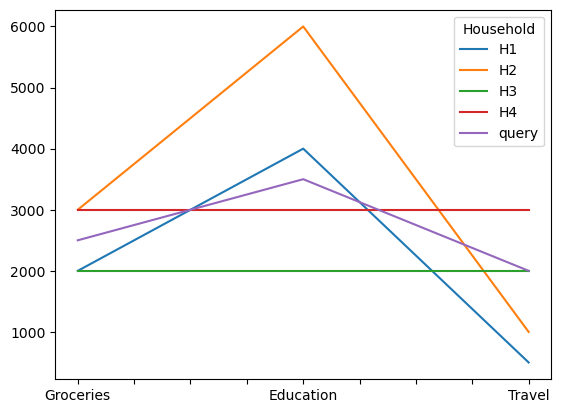

In [5]:
%matplotlib inline
house2.T.plot()

In [6]:
house_kNN = KNeighborsClassifier(n_neighbors=1)
house_kNN.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [7]:
print('Query is classified as', house_kNN.predict([q])[0])

Query is classified as C2


---
**Q4**   
Change the metric used by k-NN to correlation to see if it will predict the other class.

In [8]:
# house_kNN_Man = KNeighborsClassifier(n_neighbors=2, metric='hamming')
house_kNN_Man = KNeighborsClassifier(n_neighbors=2, metric='correlation')
house_kNN_Man.fit(X, y)
print('Query is classified as', house_kNN_Man.predict([q])[0])

Query is classified as C1


**Q5**   
In the Data Normalisation example in the 02-kNN Notebook replace the N(0,1) scaler with a min-max scaler.


**Q6**  
The code below loads the HTRU dataset from the UCI repository (https://archive.ics.uci.edu/ml/datasets/HTRU2).    
This dataset is divided into train and test sets and scaled.  
Then a *k*NN classifier is trained and tested. The time to classify the test data is also recorded.   
`scikit-learn` provides two strategies to speed up *k*-NN, `ball_tree` and `kd_tree`.  
Compare the performance of these two algorithms with brute force search `brute`.

In [9]:
# Load HTRU dataset
h_names = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Class']
HTRU_df = pd.read_csv('HTRU_2.csv', index_col=False, names=h_names)
HTRU_df = HTRU_df.sample(frac=1)

y = HTRU_df.pop('Class').values
X_raw = HTRU_df.values

X_tr_raw, X_ts_raw, y_train, y_test = train_test_split(X_raw, y, test_size=1 / 3)

scaler = preprocessing.StandardScaler().fit(X_tr_raw)  #A scaler object
X_train = scaler.transform(X_tr_raw)
X_test = scaler.transform(X_ts_raw)
X_train.shape, X_test.shape

((11932, 8), (5966, 8))

In [10]:
HTRU_kNN = KNeighborsClassifier(n_neighbors=3, algorithm='brute')
HTRU_kNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=3)

In [11]:
t_start = time.time()
acc = HTRU_kNN.score(X_test, y_test)
t = time.time() - t_start
print('Time: %5.2f Accuracy: %5.2f' % (t, acc))

Time:  0.15 Accuracy:  0.98


In [12]:
HTRU_kNN.get_params()

{'algorithm': 'brute',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}